In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import PIL.Image as Image

import PIL.ImageDraw as ImageDraw
import PIL.ImageFont as ImageFont

In [2]:
color_def = {0:'green',1:'yellow',2:'red'}
def select_traffic_light(image): 
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # green color mask
    lower = np.array([40, 50, 60])
    upper = np.array([70, 255, 255])
    green_mask = cv2.inRange(hsv, lower, upper)
    # yellow color mask
    lower = np.array([20, 100, 100])
    upper = np.array([30, 255, 255])
    yellow_mask = cv2.inRange(hsv, lower, upper)
    # red color mask
    lower_red = np.array([0,70,50])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(hsv, lower_red, upper_red)
    # red upper mask (170-180)
    lower_red = np.array([170,70,50])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)
    red_mask = mask0+mask1
    
    # combine the mask
    green_yellow_mask = cv2.bitwise_or(green_mask, yellow_mask)
    green_yellow_red_mask = cv2.bitwise_or(green_yellow_mask, red_mask)
    masked = cv2.bitwise_and(image, image, mask = green_yellow_red_mask)
    
    img_pred = cv2.addWeighted(masked,1.0,image,0.2, 0)
    array_colors = [np.mean(green_mask),np.mean(yellow_mask),np.mean(red_mask)]
    print(array_colors)
    color_detected = color_def[np.argmax(array_colors)]
    
    pil_image = Image.fromarray(np.uint8(img_pred))
    draw = ImageDraw.Draw(pil_image)
    font = ImageFont.truetype('Roboto-Regular.ttf', 30)
    draw.text((10,10),'color detected: '+color_detected,fill='white',font=font)
    
    return np.array(pil_image)


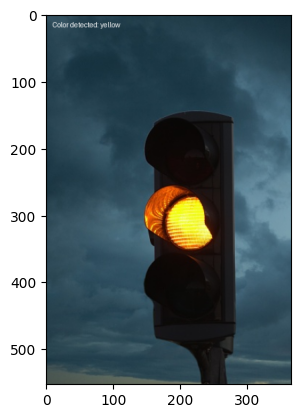

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

def select_traffic_light(img):
    # Convert image to HSV (Hue, Saturation, Value) color space
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    # Define color ranges for red, yellow, and green (these are examples, you may need to adjust)
    red_lower = np.array([0, 100, 100])
    red_upper = np.array([10, 255, 255])
    
    yellow_lower = np.array([20, 100, 100])
    yellow_upper = np.array([30, 255, 255])
    
    green_lower = np.array([40, 100, 100])
    green_upper = np.array([70, 255, 255])
    
    # Create masks for each color
    red_mask = cv2.inRange(hsv_img, red_lower, red_upper)
    yellow_mask = cv2.inRange(hsv_img, yellow_lower, yellow_upper)
    green_mask = cv2.inRange(hsv_img, green_lower, green_upper)
    
    # Calculate the percentage of each color in the image
    red_percentage = np.sum(red_mask) / (img.shape[0] * img.shape[1])
    yellow_percentage = np.sum(yellow_mask) / (img.shape[0] * img.shape[1])
    green_percentage = np.sum(green_mask) / (img.shape[0] * img.shape[1])
    
    # Determine which color has the highest percentage
    color_detected = 'unknown'
    if red_percentage > yellow_percentage and red_percentage > green_percentage:
        color_detected = 'red'
    elif yellow_percentage > red_percentage and yellow_percentage > green_percentage:
        color_detected = 'yellow'
    elif green_percentage > red_percentage and green_percentage > yellow_percentage:
        color_detected = 'green'
    
    # Display the detected color on the image
    pil_image = Image.fromarray(np.uint8(img))
    draw = ImageDraw.Draw(pil_image)
    
    try:
        font = ImageFont.truetype('Roboto-Regular.ttf', 30)
    except OSError:
        font = ImageFont.load_default()
    
    draw.text((10, 10), 'Color detected: ' + color_detected, fill='white', font=font)
    
    return np.array(pil_image)

# Load the image and process it
traffic = cv2.cvtColor(cv2.imread('/home/veeransh/Desktop/self-driven-car-ai/Data/yellow_traffic_light.png'), cv2.COLOR_BGR2RGB)
plt.imshow(select_traffic_light(traffic))
plt.show()


In [13]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np

def select_traffic_light(img):
    # Dummy function logic for detecting color (replace with actual logic)
    color_detected = "green"  # Replace with actual color detection logic
    
    pil_image = Image.fromarray(np.uint8(img))
    draw = ImageDraw.Draw(pil_image)
    
    try:
        font = ImageFont.truetype('/home/veeransh/Desktop/self-driven-car-ai/Data/other/Roboto-Regular.ttf', 30)
    except OSError:
        font = ImageFont.load_default()
        
    draw.text((10,10), 'color detected: ' + color_detected, fill='white', font=font)
    
    return np.array(pil_image)



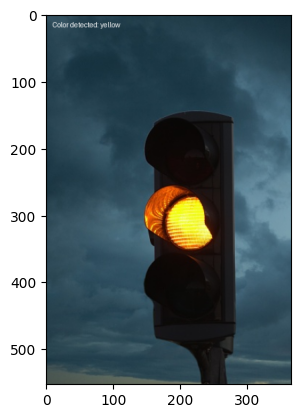

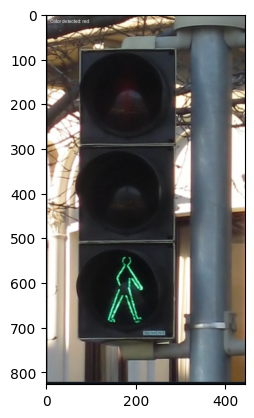

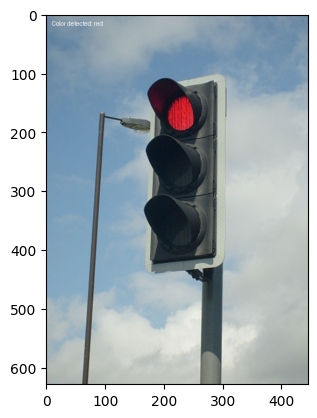

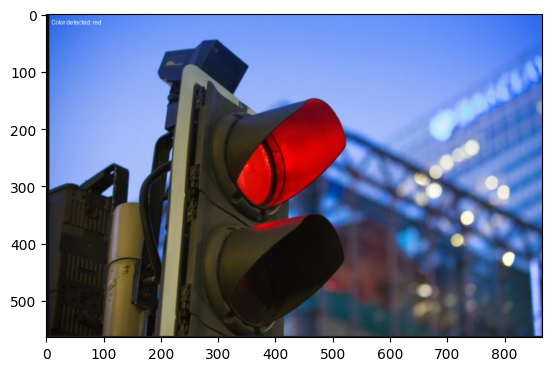

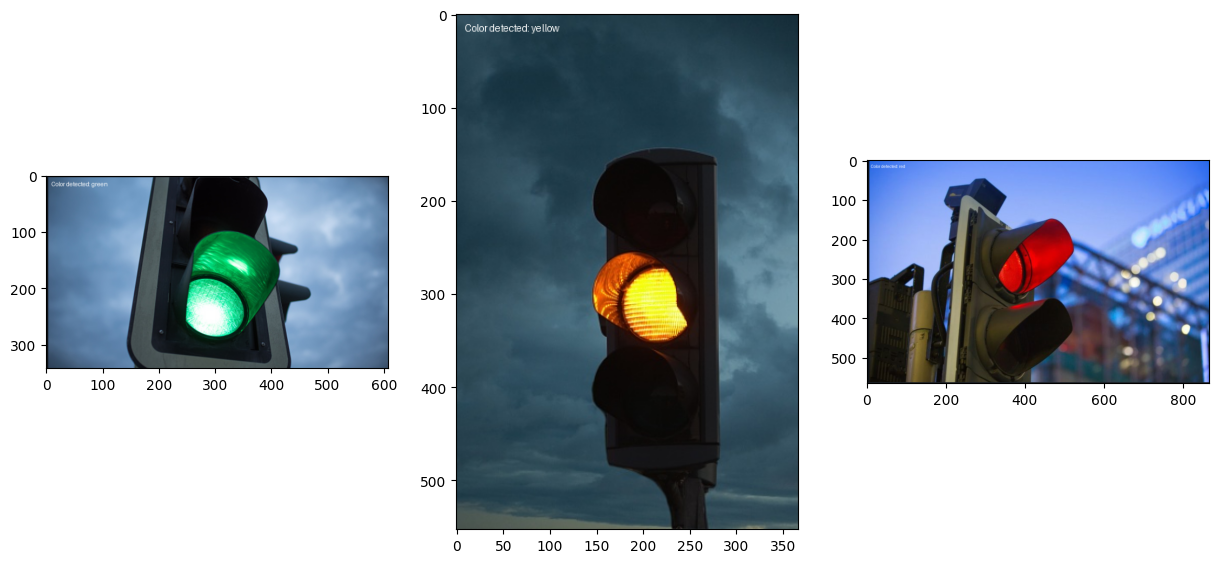

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

def select_traffic_light(img):
    # Convert image to HSV (Hue, Saturation, Value) color space
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    # Define color ranges for red, yellow, and green (these are examples, you may need to adjust)
    red_lower = np.array([0, 100, 100])
    red_upper = np.array([10, 255, 255])
    
    yellow_lower = np.array([20, 100, 100])
    yellow_upper = np.array([30, 255, 255])
    
    green_lower = np.array([40, 100, 100])
    green_upper = np.array([70, 255, 255])
    
    # Create masks for each color
    red_mask = cv2.inRange(hsv_img, red_lower, red_upper)
    yellow_mask = cv2.inRange(hsv_img, yellow_lower, yellow_upper)
    green_mask = cv2.inRange(hsv_img, green_lower, green_upper)
    
    # Calculate the percentage of each color in the image
    red_percentage = np.sum(red_mask) / (img.shape[0] * img.shape[1])
    yellow_percentage = np.sum(yellow_mask) / (img.shape[0] * img.shape[1])
    green_percentage = np.sum(green_mask) / (img.shape[0] * img.shape[1])
    
    # Determine which color has the highest percentage
    color_detected = 'unknown'
    if red_percentage > yellow_percentage and red_percentage > green_percentage:
        color_detected = 'red'
    elif yellow_percentage > red_percentage and yellow_percentage > green_percentage:
        color_detected = 'yellow'
    elif green_percentage > red_percentage and green_percentage > yellow_percentage:
        color_detected = 'green'
    
    # Display the detected color on the image
    pil_image = Image.fromarray(np.uint8(img))
    draw = ImageDraw.Draw(pil_image)
    
    try:
        font = ImageFont.truetype('Roboto-Regular.ttf', 90)
    except OSError:
        font = ImageFont.load_default()
    
    draw.text((10, 10), 'Color detected: ' + color_detected, fill='white', font=font)
    
    return np.array(pil_image)

# Load the image and process it
traffic = cv2.cvtColor(cv2.imread('/home/veeransh/Desktop/self-driven-car-ai/Data/yellow_traffic_light.png'), cv2.COLOR_BGR2RGB)
plt.imshow(select_traffic_light(traffic))
plt.show()

traffic = cv2.cvtColor(cv2.imread('/home/veeransh/Desktop/self-driven-car-ai/Data/green_traffic_light_walking.png'), cv2.COLOR_BGR2RGB)
plt.imshow(select_traffic_light(traffic))
plt.show()

traffic = cv2.cvtColor(cv2.imread('/home/veeransh/Desktop/self-driven-car-ai/Data/red_traffic_light.png'), cv2.COLOR_BGR2RGB)
plt.imshow(select_traffic_light(traffic))
plt.show()

traffic = cv2.cvtColor(cv2.imread('/home/veeransh/Desktop/self-driven-car-ai/Data/red_traffic_light_2.png'), cv2.COLOR_BGR2RGB)
plt.imshow(select_traffic_light(traffic))
plt.show()




plt.figure(figsize = (15, 10))
plt.subplot(1, 3, 1)
traffic = cv2.cvtColor(cv2.imread('/home/veeransh/Desktop/self-driven-car-ai/Data/green_traffic_light2.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(select_traffic_light(traffic))
plt.subplot(1, 3, 2)
traffic = cv2.cvtColor(cv2.imread('/home/veeransh/Desktop/self-driven-car-ai/Data/yellow_traffic_light.png'), cv2.COLOR_BGR2RGB)
plt.imshow(select_traffic_light(traffic))
plt.subplot(1, 3, 3)
traffic = cv2.cvtColor(cv2.imread('/home/veeransh/Desktop/self-driven-car-ai/Data/red_traffic_light_2.png'), cv2.COLOR_BGR2RGB)
plt.imshow(select_traffic_light(traffic))
plt.show()